# Importe

In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import statsmodels.api as sm
import scipy as sp

import matplotlib.pyplot as plt

from uncertainties import ufloat

plt.rc('text',usetex=True)    # Dieser Befehl überschreibt die Grafiken in LaTeX Formation


# Daten

## Versuchsdaten

### Eichfehler Digital-Stoppuhr

In [3]:
def delta_t(T):
    c=0.01+5e-4*T
    return c


### Teilungsfehler, Messschieber

In [4]:
def delta_l(s):
    c=5e-5+5e-5*s
    return c


## Geometrie und Masse der Scheibe

In [5]:
# Scheibe
m_s=245.3/1000   # Masse in kg

m_s_err=ufloat(m_s,0.1/1000)
print(m_s_err)
d_s=4.81/100            # Durchmesser m
d_s_err=ufloat(d_s,5e-5)
r_s=d_s/2              # Radius in m
r_s_err=d_s_err/2
r_s_err

0.24530+/-0.00010


0.02405+/-2.5e-05

# daten von Scheibe laden

In [6]:
Sch=pd.read_csv('Daten_Scheibe.txt','\t',index_col='Index')
s=np.array(Sch['s']) /100                          # in cm
T1_S1=np.array(Sch['T1'])/10                         # in Sekunden
T2_S1=np.array(Sch['T2'])/10 

print(Sch)

s=s[1:]
T1_S=T1_S1[1:]
T2_S=T2_S1[1:]

          s    T1    T2  T_err
Index                         
Tisch   NaN  4.66  4.55    0.5
P1     0.00  4.96  4.98    0.5
P2     1.12  5.02  5.08    0.5
P4     2.81  5.53  5.70    0.5
P5     4.17  6.48  6.50    0.5
P6     5.66  7.51  7.32    0.5
P7     7.14  8.47  8.44    0.5


# Zeit mitteln

In [7]:
# T1 und T2 in einem Array
T_S=np.zeros((7,2))
for i in range(7):
    for j in range(2):
        if j==0:
            T_S[i][0]=T1_S1[i]
        else:
            T_S[i][1]=T2_S1[i]
            
# Mittel von T1 und T2
T_S_mean=np.zeros(7)
for i in range(7):
    T_S_mean[i]=T_S[i].mean()
print(T_S_mean)

# Standardabweichung von T_S
T_S_std=np.zeros(7)
for i in range(7):
    T_S_std[i]=np.std(T_S[i],ddof=1)
T_S_std

[0.4605 0.497  0.505  0.5615 0.649  0.7415 0.8455]


array([0.00777817, 0.00141421, 0.00424264, 0.01202082, 0.00141421,
       0.01343503, 0.00212132])

# Mittlerer Abstand zwischen zwei aneinder liegenden Punkten

In [8]:
s_lst=[]
for i in range(len(s)):
    if i==0:
        k=s[0]-s[i]
        s_lst.append(k)
    else:
        k=s[i]-s[i-1]
        s_lst.append(k)
s_lst=np.array([s_lst])
s_lst.mean()

0.011899999999999999

# Eichfehler 

In [9]:
# Eichfehler Dig.-Stoppuhr
T1_err=delta_t(T1_S)
T2_err=delta_t(T2_S)

print(T1_err)
print(T2_err)


[0.010248  0.010251  0.0102765 0.010324  0.0103755 0.0104235]
[0.010249 0.010254 0.010285 0.010325 0.010366 0.010422]


In [10]:
# Teilungsfehler 
s_err_einzen=delta_l(s)
#print(s)
print(len(s))
u_s=np.array([5e-5,5e-5,5e-5,5e-5,5e-5,5e-5])
s_err_einzen

6


array([5.0000e-05, 5.0560e-05, 5.1405e-05, 5.2085e-05, 5.2830e-05,
       5.3570e-05])

Beim Messen wurde ein grober Messfehler gemacht, indem der Experimentator auf die erste Nachkommastelle gerundet hat.
Beispielsweise wurde gemessen: 3.15mm, dann hat der Experimentator wie folgt gerundet: 3.2mm

In [11]:
#ufloat(1120e-5,5.0560e-5)
#0.00005==5e-5

In [12]:
s_err=np.array([ufloat(0,5e-5),ufloat(1120e-5,5e-5),ufloat(2810e-5,5e-5),ufloat(4170e-5,5e-5),ufloat(5660e-5,5e-5),ufloat(7140e-5,5e-5)])
s_err

array([0.0+/-5e-05, 0.0112+/-5e-05, 0.0281+/-5e-05, 0.0417+/-5e-05,
       0.0566+/-5e-05, 0.0714+/-5e-05], dtype=object)

# Gleichungen
$$ J_{sch}=0.5 m r^{2}\\ J_{z}=J_{s}+ms^{2}$$
$J_{sch}$ ist das Trägheitsmoment der Scheibe und $J_{z}$ ist der Steinersche Satz

In [13]:
def J_sch(m,r):
    c=0.5*m*r**2
    return c

def J_z(m,r,s):
    c=J_sch(m,r)+m*s**2
    return c


# Berechnung von J_Z
J_z_err=J_z(m_s_err,r_s_err,s_err)
print(J_z_err)
J_z=J_z(m_s ,r_s ,s)
J_z=np.array(J_z)

# error x-Achse   
xerr=np.array([1.5e-7,3e-7,7e-7,1.1e-6,1.4e-6,1.8e-6])
#J_z_list=np.array(J_z_list)


[7.0941066625e-05+/-1.5029530326629059e-07
 0.000101711498625+/-3.1456549065640727e-07
 0.000264632399625+/-7.131027145749455e-07
 0.000497490783625+/-1.0531905342995427e-06
 0.000856774334625+/-1.4392342138974137e-06
 0.0013214706546250002+/-1.8383461173709667e-06]


In [14]:
# error y-Achse
ut=2*T1_S*np.sqrt(0.5**2+0.01**2)# Eichfehler und Reaktionszeit
ut1= 2*T1_S*T_S_std[1:]

In [15]:
print(np.min(J_z),np.max(J_z))

7.0941066625e-05 0.0013214706546249998


# Lineare Regression

## Regressionsgerade

In [16]:
# Regressionsgerade
def reg_scheibe(x,a,b):
    c=4*np.pi**2/a*(x+b)
    return c
ut11=[]
for i in range(6):
    c=ut1[i]
    ut11.append(c)
print(ut1)
print(ut11)

[0.0014029  0.00425961 0.01329502 0.00183282 0.02017941 0.00359352]
[0.0014028998538741504, 0.004259611249867766, 0.01329502169986948, 0.001832820776835533, 0.02017941332150171, 0.003593516661990171]


## Bestimmung der Regressionsparameter mit Scipy

### Scheibe, gewichtet

In [17]:
T1_S_sq=T_S_mean[1:]**2
pop,cov=curve_fit(reg_scheibe,J_z,T1_S_sq,sigma=ut11)
a,b=pop
da,db=np.sqrt(np.diag(cov))
#a=round(a,0)
b=round(b,5)
#da=round(da,0)
db=round(db,5)
print(a)
print(b)
print(da)
print(db)
a_err=ufloat(a,da)
b_err=ufloat(b,db)
print('a: ',a_err,', Standardabweichung',round(da/a*100,2),'%')
print('b: ',b_err,', Standardabweichung',round(db/b*100,2),'%')

0.1035706798434592
0.00058
0.002467712213797095
2e-05
a:  0.1036+/-0.0025 , Standardabweichung 2.38 %
b:  0.000580+/-0.000020 , Standardabweichung 3.45 %


In [18]:
#2*0.466*(0.05+0.001)

In [19]:
# Trägheitsmoment des tisches
# teil 1
tt=ufloat(0.4605,0.05)
J_Tisch=tt**2/(4*np.pi**2/a)
print('J_Tisch 1:',J_Tisch)
print(round(1.2/5.6,2)*100,'%, mit Reaktionszeit')


# teil 2
t_sq_err=reg_scheibe(0,a_err,b_err)
tisch=t_sq_err/(4*np.pi**2/a_err)
print('J_Tisch 2: ',tisch)
print(round(0.2/5.6,2)*100,'%, mit Standardabweichung')

J_Tisch 1: 0.00056+/-0.00012
21.0 %, mit Reaktionszeit
J_Tisch 2:  0.000580+/-0.000020
4.0 %, mit Standardabweichung


Der große Fehler für das Trägheitsmoment vom Tisch rührt von dem großen Fehler in der Periodendauer, die ihren Ursprung in der Reaktionszeit hat.

## Bestimmung der Regressionsparameter mit Statsmodels

## Scheibe

In [20]:
x=J_z


# Lineare Regression 

y=T_S_mean[1:]**2
x_zunahme=sm.add_constant(x)
results=sm.OLS(y,x_zunahme).fit()
print('''
Lineare Regression
''')
print(results.summary())



Lineare Regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2670.
Date:                Fri, 07 May 2021   Prob (F-statistic):           8.39e-07
Time:                        19:57:17   Log-Likelihood:                 21.660
No. Observations:                   6   AIC:                            -39.32
Df Residuals:                       4   BIC:                            -39.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2208      0.00

C:\Users\Ben Fliegener\Miniconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


# Unsicherheiten

$$ u_{z}=\sqrt{(\frac{\partial z}{\partial a})^{2}u_{a}^{2}+(\frac{\partial z}{\partial b})^{2}u_{b}^{2}+(\frac{\partial z}{\partial c})^{2}u_{c}^{2}+....}$$

In [21]:
m=1.352
u_m=0.0001
r=0.02405
u_r=(2.5e-5)

## Unsicherheit $T^{2}$

$$ T_{sq}=\left(\frac{T}{10}\right)^{2}\\ \Rightarrow u_{T^2}=\sqrt{\frac{4 T^{2}}{100^{2}}u_{T}^{2}}\\=\frac{2}{100}T u_{T}$$
$u_{T}$ ist Eichfehler von Stoppuhr 

In [22]:
u_t_sq=2*T_S_mean[1:]*delta_t(T_S_mean[1:])
print(r'Unsicherheit von T^{2}: ',u_t_sq)

Unsicherheit von T^{2}:  [0.01018701 0.01035503 0.01154528 0.0134012  0.01537982 0.01762487]


## Unsicherheit $J_{sch}$

$$ J_{sch}=\frac{1}{2} m r^{2}\\ u_{J_{sch}}=\frac{1}{2}\sqrt{u_{m}^{2}r^{4}+(2 m r u_{r})^{2}}\\=\frac{r^{2}}{2}\sqrt{u_{m}^{2} r^{2}+(2 m   u_{r})^{2}}$$

In [23]:
u_sch=r**2/2*np.sqrt(u_m**2*r**2+4*m**2*u_r**2)
u_sch

1.9562372978464435e-08

## Unsicherheit $J_{Z}$

$$ J_{z}=\frac{1}{2} m r^{2}+ms^{2}\\ u_{Z}=\sqrt{\frac{r^{2}}{4}(u_{m}^{2} r^{2}+(2 m   u_{r})^{2})+u_{m}^{2}s^{4}+4(ms)^{2}u_{s}^{2}} $$

In [24]:
u_z=np.sqrt(r**2/2*(u_m**2*r**2+4*m**2*u_r**2)+u_m**2*s**2+s**2*4*m**2*u_s**2)
u_z

array([1.15032737e-06, 2.20693811e-06, 4.86340064e-06, 7.10615177e-06,
       9.58732780e-06, 1.20618683e-05])

## Unsicherheit $J_{tisch}$

$$ T^{2}=\frac{4\pi^{2}}{D}(J_{Z}=0)+\frac{4\pi^{2}}{D}J_{Tisch}\\ T^{2}=\frac{4\pi^{2}}{D}J_{Tisch}\\J_{Tisch}=\frac{D}{4\pi^{2}}T^{2} \\ \Rightarrow u_{J_{tisch}}=\frac{1}{4\pi^{2}}\sqrt{u_{D}^{2}T^{4}+2DT^{2}u_{T}^{2}}$$

In [25]:
T_sq=T_S_mean[0]**2
u_T_sq=2*T_S_mean[0]*0.01
D=a
u_D=da

In [26]:
u_tisch=1/(4*np.pi**2)*np.sqrt(u_D**2*T_sq**2+2*D*T_sq*u_T_sq)
u_tisch

0.0005096594257746136

In [27]:
# J_tisch
jj_tisch=D/(4*np.pi)*T_S_mean[0]**2
print('J_tisch',jj_tisch)
print('Fehler: ', u_tisch, ' in %: ',u_tisch /jj_tisch*100)

J_tisch 0.0017477778536292153
Fehler:  0.0005096594257746136  in %:  29.16042360396769


# Plot

[0.0028058  0.00851922 0.02659004 0.00366564 0.04035883 0.00718703]
[3.0e-07 6.0e-07 1.4e-06 2.2e-06 2.8e-06 3.6e-06]


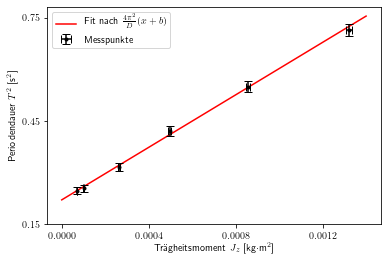

In [28]:

xx=np.linspace(0,0.0014,500)
#print(xx)
#print(xerr)
#print(J_z)
u=2*np.array(ut11)
print(u)
x_sig=2*np.array(xerr)
print(x_sig)
plt.errorbar(J_z,T1_S_sq,xerr=u_z,yerr=u_t_sq,fmt='k.',label=r'Messpunkte',capsize=4,zorder=2)
plt.plot(xx,reg_scheibe(xx,a,b),'r',label=r'Fit nach $\frac{4 \pi^{2}}{D}(x+b)$',zorder=1)
#plt.errorbar(0,reg_scheibe(0,a ,b ),yerr=(0.00004),fmt='b.',label=r'$T_{Tisch}^{2}$ für J',capsize=4)
plt.xticks(np.arange(0, 0.0016, step=4e-4))
plt.yticks(np.arange(0.15,0.99,step=0.3))
plt.xlabel(r'Trägheitsmoment $J_{z}$ [kg$\cdot$m$^{2}$]')
plt.ylabel(r'Periodendauer $T^{2}$ [s$^{2}$]')
plt.legend()

#plt.show()
plt.savefig('Regression_M2_J_Tisch.png',dpi=500)

Die Fehlerbalken sind in der Fehlerfortpflanzung entstanden,

$R^{2}=0.999$

$\chi^{2}=2.5$

In [29]:
sp.stats.chisquare( J_z,T1_S_sq,ddof=2)

Power_divergenceResult(statistic=2.496988357071899, pvalue=0.47583560053963814)